In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 
from sklearn import preprocessing
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('sample.csv', sep=',')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-18,DL,DL,DL,2653,DL,N321US,2653,14492,RDU,"Raleigh/Durham, NC",10397,ATL,"Atlanta, GA",730,723.0,-7.0,38.0,801.0,853.0,6.0,856,859.0,3.0,0.0,NaN,0.0,N,86.0,96.0,52.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-30,DL,DL_CODESHARE,DL,5211,9E,N8980A,5211,13487,MSP,"Minneapolis, MN",11203,CWA,"Mosinee, WI",1019,1014.0,-5.0,48.0,1102.0,1140.0,6.0,1117,1146.0,29.0,0.0,NaN,0.0,N,58.0,92.0,38.0,1.0,175.0,0.0,0.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-10-23,AA,AA_CODESHARE,AA,4715,YX,N124HQ,4715,14576,ROC,"Rochester, NY",11057,CLT,"Charlotte, NC",1850,1842.0,-8.0,13.0,1855.0,2028.0,28.0,2055,2056.0,1.0,0.0,NaN,0.0,N,125.0,134.0,93.0,1.0,573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-29,AA,AA,AA,2807,AA,N957AN,2807,13303,MIA,"Miami, FL",15304,TPA,"Tampa, FL",1335,1356.0,21.0,22.0,1418.0,1458.0,10.0,1438,1508.0,30.0,0.0,NaN,0.0,N,63.0,72.0,40.0,1.0,204.0,21.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2018-07-17,UA,UA_CODESHARE,UA,5698,OO,N925EV,5698,13930,ORD,"Chicago, IL",14696,SBN,"South Bend, IN",1944,2035.0,51.0,19.0,2054.0,2214.0,5.0,2135,2219.0,44.0,0.0,NaN,0.0,N,51.0,44.0,20.0,1.0,84.0,0.0,0.0,0.0,0.0,44.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(105000, 42)

In [4]:
# select cols to keep
df1 = df.drop(columns=['branded_code_share', 'mkt_carrier', 'op_unique_carrier', 'op_carrier_fl_num', \
                       'origin_airport_id', 'origin_city_name', 'dest_airport_id', 'dest_city_name', 'tail_num', \
                       'dup', 'diverted', 'cancellation_code', 'no_name', 'first_dep_time', 'total_add_gtime', \
                       'longest_add_gtime', 'cancelled'])

In [5]:
# Evaluate outliers
IQR = (df1['arr_delay'].quantile(0.75)-df1['arr_delay'].quantile(0.25))
lower_outlier = df1['arr_delay'].quantile(0.25) - 1.5*IQR
upper_outlier = df1['arr_delay'].quantile(0.75) + 1.5*IQR
print(lower_outlier, upper_outlier)

-58.5 65.5


In [6]:
# get rid of outliers
df1 = df1[(df1['arr_delay'] < upper_outlier) & (df1['arr_delay'] > lower_outlier)]
#plt.hist(df1['arr_delay'], bins=100);

In [7]:
df1.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
mkt_carrier_fl_num         0
origin                     0
dest                       0
crs_dep_time               0
dep_time                   0
dep_delay                 26
taxi_out                  37
wheels_off                37
wheels_on                 37
taxi_in                   37
crs_arr_time               0
arr_time                   0
arr_delay                  0
crs_elapsed_time           0
actual_elapsed_time        0
air_time                  37
flights                    0
distance                   0
carrier_delay          74713
weather_delay          74713
nas_delay              74713
security_delay         74713
late_aircraft_delay    74713
dtype: int64

In [8]:
weather = df1[df1['weather_delay'].notnull()]
weather = weather[weather['weather_delay']>0]
weather.shape

(896, 25)

<AxesSubplot:xlabel='origin', ylabel='weather_delay'>

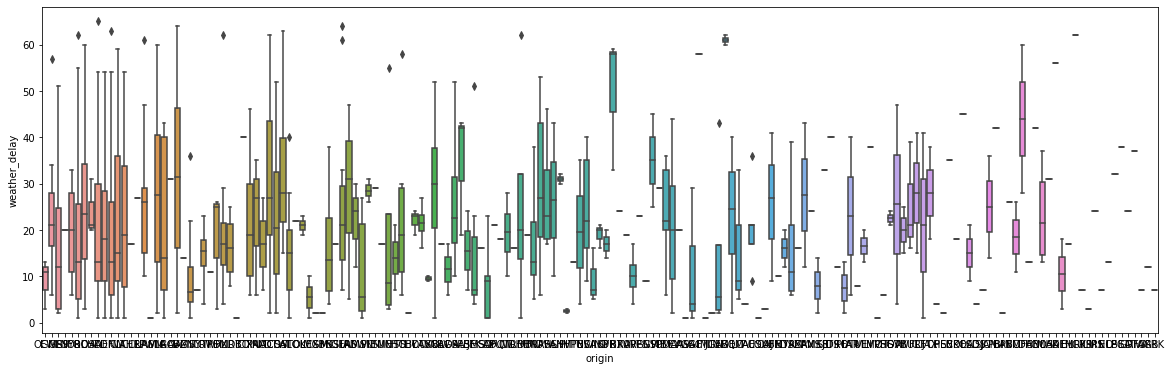

In [9]:
fig = plt.subplots(figsize=(20,6))
sns.boxplot(x='origin', y='weather_delay', data=weather)

In [10]:
carrier_delay = df1[df1['carrier_delay'].notnull()]
carrier_delay = carrier_delay[carrier_delay['carrier_delay']>0]
carrier_delay.shape

(9905, 25)

<AxesSubplot:xlabel='origin', ylabel='carrier_delay'>

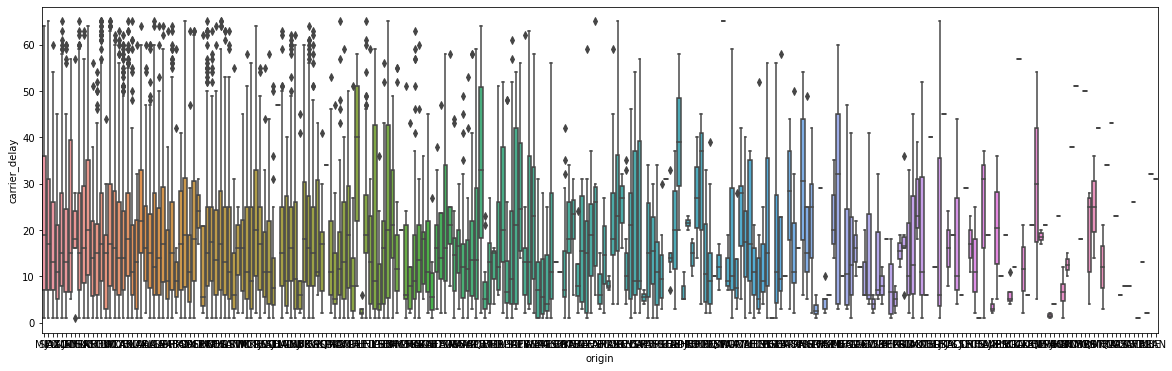

In [11]:
fig = plt.subplots(figsize=(20,6))
sns.boxplot(x='origin', y='carrier_delay', data=carrier_delay)

**Most of the delay columns at the end are missing values, so not much reliable information can be derived (Roughly 80% is missing).**

In [12]:
# change flight date to datetime
df1['fl_date'] = pd.to_datetime(df1['fl_date'])
#df1.dtypes

In [13]:
# create year, month, day, dayofweek columns
df1['year'] = df1['fl_date'].dt.year
df1['month'] = df1['fl_date'].dt.month
df1['day'] = df1['fl_date'].dt.day
df1['dayofweek'] = df1['fl_date'].dt.dayofweek

In [14]:
# check for null values and drop if there are any
df1['dep_time'].isnull().sum()
df1['arr_time'].isnull().sum()

0

In [15]:
df1 = df1.dropna(axis=0, subset=['dep_time', 'arr_time'])

In [16]:
# change datatype to int first to lose the decimal and then convert to string
df1['crs_dep_time'] = df1['crs_dep_time'].astype(int)
df1['crs_arr_time'] = df1['crs_arr_time'].astype(int)
df1['crs_dep_time'] = df1['crs_dep_time'].astype(str)
df1['crs_arr_time'] = df1['crs_arr_time'].astype(str)

In [17]:
# create departure hour and arrival hour columns
df1['crs_dep_time'] = df1['crs_dep_time'].apply(lambda x: str(x).zfill(4))
df1['crs_arr_time'] = df1['crs_arr_time'].apply(lambda x: str(x).zfill(4))
df1['dep_h'] = df1['crs_dep_time'].str[0:2]
df1['arr_h'] = df1['crs_arr_time'].str[0:2]
df1['dep_h'] = df1['dep_h'].replace('24', '00')  #some values have hour as 24. Assuming here that it means 00
df1['arr_h'] = df1['arr_h'].replace('24', '00')

In [18]:
df1.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,dayofweek,dep_h,arr_h
0,2018-06-18,DL,2653,RDU,ATL,0730,723.0,-7.0,38.0,801.0,853.0,6.0,0856,859.0,3.0,86.0,96.0,52.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,2018,6,18,0,07,08
1,2019-11-30,DL,5211,MSP,CWA,1019,1014.0,-5.0,48.0,1102.0,1140.0,6.0,1117,1146.0,29.0,58.0,92.0,38.0,1.0,175.0,0.0,0.0,29.0,0.0,0.0,2019,11,30,5,10,11
2,2018-10-23,AA,4715,ROC,CLT,1850,1842.0,-8.0,13.0,1855.0,2028.0,28.0,2055,2056.0,1.0,125.0,134.0,93.0,1.0,573.0,NaN,NaN,NaN,NaN,NaN,2018,10,23,1,18,20
3,2019-04-29,AA,2807,MIA,TPA,1335,1356.0,21.0,22.0,1418.0,1458.0,10.0,1438,1508.0,30.0,63.0,72.0,40.0,1.0,204.0,21.0,0.0,9.0,0.0,0.0,2019,4,29,0,13,14
4,2018-07-17,UA,5698,ORD,SBN,1944,2035.0,51.0,19.0,2054.0,2214.0,5.0,2135,2219.0,44.0,51.0,44.0,20.0,1.0,84.0,0.0,0.0,0.0,0.0,44.0,2018,7,17,1,19,21


In [19]:
# Aggregate data to study relationships and consider feature engineering

In [20]:
# calculate mean delay based on carrier
carrier = df1.groupby('mkt_unique_carrier')['arr_delay'].mean().index.to_list()
mean_delay_carrier = df1.groupby('mkt_unique_carrier')['arr_delay'].mean().to_list()

In [21]:
# calculate mean delay based on origin of the flight
origin = df1.groupby('origin')['arr_delay'].mean().index.to_list()
mean_delay_origin = df1.groupby('origin')['arr_delay'].mean().to_list()

In [22]:
# calculate mean delay based on destination of the flight
dest = df1.groupby('dest')['arr_delay'].mean().index.to_list()
mean_delay_dest = df1.groupby('dest')['arr_delay'].mean().to_list()

In [23]:
# calculate mean delay based on month
month = df1.groupby('month')['arr_delay'].mean().index.to_list()
mean_delay_month = df1.groupby('month')['arr_delay'].mean().to_list()

In [24]:
# calculate mean delay based on scheduled departure hour
dep_hour = df1.groupby('dep_h')['arr_delay'].mean().index.to_list()
mean_delay_dep_h = df1.groupby('dep_h')['arr_delay'].mean().to_list()

# calculate mean delay based on scheduled arrival hour
arr_hour = df1.groupby('arr_h')['arr_delay'].mean().index.to_list()
mean_delay_arr_h = df1.groupby('arr_h')['arr_delay'].mean().to_list()

In [25]:
# calculate mean delay based on day of week
day_of_week = df1.groupby('dayofweek')['arr_delay'].mean().index.to_list()
mean_delay_day_of_week = df1.groupby('dayofweek')['arr_delay'].mean().to_list()

In [26]:
# calculate delays based on route
df1['route'] = df1['origin'] + df1['dest']
route = df1.groupby('route')['arr_delay'].mean().index.to_list()
mean_delay_route = df1.groupby('route')['arr_delay'].mean().to_list()

In [27]:
# calculate mean taxi_out per departure hour
dep_h_taxi_out = df1.groupby('dep_h')['taxi_out'].mean().index.to_list()
mean_taxi_out_per_dep_h = df1.groupby('dep_h')['taxi_out'].mean().to_list()

In [28]:
# calculate mean taxi_in per arrival hour
arr_h_taxi_in = df1.groupby('arr_h')['taxi_in'].mean().index.to_list()
mean_taxi_in_per_arr_h = df1.groupby('arr_h')['taxi_in'].mean().to_list()

In [29]:
# number of flights per dep_h
flights_dep_h = df1.groupby('dep_h')['flights'].count().index.to_list()
num_flights_per_dep_h = df1.groupby('dep_h')['flights'].count().to_list()

In [30]:
# save the summaries above into separate dataframes
df_carrier_delays = pd.DataFrame({'carrier': carrier, 'mean_delay_carrier': mean_delay_carrier})
df_origin_delays = pd.DataFrame({'origin': origin, 'mean_delay_origin': mean_delay_origin})
df_dest_delays = pd.DataFrame({'dest': dest, 'mean_delay_dest': mean_delay_dest})
df_month_delays = pd.DataFrame({'month': month, 'mean_delay_month': mean_delay_month})
df_dep_h_delays = pd.DataFrame({'dep_h': dep_hour, 'mean_delay_dep_h': mean_delay_dep_h})
df_arr_h_delays = pd.DataFrame({'arr_h': arr_hour, 'mean_delay_arr_h': mean_delay_arr_h})
df_day_of_week_delays = pd.DataFrame({'dayofweek': day_of_week, 'mean_delay_day_of_week': mean_delay_day_of_week})
df_route_delays = pd.DataFrame({'route': route, 'mean_delay_route': mean_delay_route})
df_dep_h_taxi_out = pd.DataFrame({'dep_h': dep_h_taxi_out, 'mean_taxi_out_per_dep_h': mean_taxi_out_per_dep_h})
df_arr_h_taxi_out = pd.DataFrame({'arr_h': arr_h_taxi_in, 'mean_taxi_in_per_arr_h': mean_taxi_in_per_arr_h})
df_flights_dep_h = pd.DataFrame({'dep_h': flights_dep_h, 'num_flights_per_dep_h': num_flights_per_dep_h})

In [31]:
# Save the historical summaries into .csv files for later use with the test file
df_carrier_delays.to_csv('feature_data/df_carrier_delays.csv')
df_origin_delays.to_csv('feature_data/df_origin_delays.csv')
df_dest_delays.to_csv('feature_data/df_dest_delays.csv')
df_month_delays.to_csv('feature_data/df_month_delays.csv')
df_dep_h_delays.to_csv('feature_data/df_dep_h_delays.csv')
df_arr_h_delays.to_csv('feature_data/df_arr_h_delays.csv')
df_day_of_week_delays.to_csv('feature_data/df_day_of_week_delays.csv')
df_route_delays.to_csv('feature_data/df_route_delays.csv')
df_dep_h_taxi_out.to_csv('feature_data/df_dep_h_taxi_out.csv')
df_arr_h_taxi_out.to_csv('feature_data/df_arr_h_taxi_in.csv')
df_flights_dep_h.to_csv('feature_data/df_flights_dep_h.csv')

### Create a dataframe using same columns as in the test file

In [32]:
df_test = df1[['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin', \
               'dest', 'route', 'crs_dep_time', 'dep_h', 'crs_arr_time', 'arr_h', 'crs_elapsed_time', 'distance', \
               'arr_delay']]

In [33]:
df_test = df_test.dropna()

In [34]:
# check if dataset is imbalanced before prepping it for modelling
neg_delays = df_test[df_test['arr_delay']<0].shape[0]
pos_delays = df_test[df_test['arr_delay']>0].shape[0]
print(neg_delays, pos_delays)
print(neg_delays/pos_delays )

49986 45667
1.0945759520003504


In [35]:
df_test.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0


### Merge dataframes based on historical summary statistics

#### Add column for carrier delay

In [36]:
df_merged = df_test.merge(df_carrier_delays, how='left', left_on='mkt_unique_carrier' , right_on='carrier')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,carrier,mean_delay_carrier
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,DL,-1.501244
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,DL,-1.501244
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,AA,2.575061
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,AA,2.575061
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,UA,1.799225


In [37]:
df_merged = df_merged.drop(columns='carrier')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225


#### Add column for origin delay

In [38]:
df_merged = df_merged.merge(df_origin_delays, how='left', left_on='origin' , right_on='origin')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817


#### Add column for destination delay

In [39]:
df_merged = df_merged.merge(df_dest_delays, how='left', left_on='dest' , right_on='dest')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000


#### Add column for month delay

In [40]:
df_merged = df_merged.merge(df_month_delays, how='left', left_on='month' , right_on='month')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597


#### Add column for departure hour delay

In [41]:
df_merged = df_merged.merge(df_dep_h_delays, how='left', left_on='dep_h' , right_on='dep_h')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790


#### Add column for arrival hour delay

In [42]:
df_merged = df_merged.merge(df_arr_h_delays, how='left', left_on='arr_h' , right_on='arr_h')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582,-2.389031
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673,-0.804787
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463,4.740441
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908,1.266858
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790,4.449983


#### Add column for day of week delay

In [43]:
df_merged = df_merged.merge(df_day_of_week_delays, how='left', left_on='dayofweek' , right_on='dayofweek')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h,mean_delay_day_of_week
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582,-2.389031,1.980472
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673,-0.804787,-0.405668
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463,4.740441,1.115516
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908,1.266858,1.980472
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790,4.449983,1.115516


#### Add column for route delay

In [44]:
df_merged = df_merged.merge(df_route_delays, how='left', left_on='route' , right_on='route')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h,mean_delay_day_of_week,mean_delay_route
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582,-2.389031,1.980472,1.563380
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673,-0.804787,-0.405668,13.333333
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463,4.740441,1.115516,-6.666667
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908,1.266858,1.980472,8.820513
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790,4.449983,1.115516,9.666667


#### Add column for taxi out times per depature hour

In [45]:
df_merged = df_merged.merge(df_dep_h_taxi_out, how='left', left_on='dep_h' , right_on='dep_h')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h,mean_delay_day_of_week,mean_delay_route,mean_taxi_out_per_dep_h
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582,-2.389031,1.980472,1.563380,18.512856
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673,-0.804787,-0.405668,13.333333,18.665494
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463,4.740441,1.115516,-6.666667,18.517988
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908,1.266858,1.980472,8.820513,16.893937
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790,4.449983,1.115516,9.666667,17.393297


#### Add column for taxi in times per arrival hour

In [46]:
df_merged = df_merged.merge(df_arr_h_taxi_out, how='left', left_on='arr_h' , right_on='arr_h')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h,mean_delay_day_of_week,mean_delay_route,mean_taxi_out_per_dep_h,mean_taxi_in_per_arr_h
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582,-2.389031,1.980472,1.563380,18.512856,9.050598
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673,-0.804787,-0.405668,13.333333,18.665494,7.416681
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463,4.740441,1.115516,-6.666667,18.517988,8.254826
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908,1.266858,1.980472,8.820513,16.893937,7.653950
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790,4.449983,1.115516,9.666667,17.393297,7.977602


#### Add column for number of flights per departure hour

In [47]:
df_merged = df_merged.merge(df_flights_dep_h, how='left', left_on='dep_h' , right_on='dep_h')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h,mean_delay_day_of_week,mean_delay_route,mean_taxi_out_per_dep_h,mean_taxi_in_per_arr_h,num_flights_per_dep_h
0,2018,6,18,0,DL,2653,RDU,ATL,RDUATL,0730,07,0856,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582,-2.389031,1.980472,1.563380,18.512856,9.050598,6419
1,2019,11,30,5,DL,5211,MSP,CWA,MSPCWA,1019,10,1117,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673,-0.804787,-0.405668,13.333333,18.665494,7.416681,5973
2,2018,10,23,1,AA,4715,ROC,CLT,ROCCLT,1850,18,2055,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463,4.740441,1.115516,-6.666667,18.517988,8.254826,5449
3,2019,4,29,0,AA,2807,MIA,TPA,MIATPA,1335,13,1438,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908,1.266858,1.980472,8.820513,16.893937,7.653950,5329
4,2018,7,17,1,UA,5698,ORD,SBN,ORDSBN,1944,19,2135,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790,4.449983,1.115516,9.666667,17.393297,7.977602,5193


In [48]:
data = df_merged.copy()

In [49]:
#df_corr = data.corr()
#sns.heatmap(df_corr)

In [50]:
data = data.drop(columns=['crs_dep_time', 'crs_arr_time', 'route'])
data.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,dep_h,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h,mean_delay_day_of_week,mean_delay_route,mean_taxi_out_per_dep_h,mean_taxi_in_per_arr_h,num_flights_per_dep_h
0,2018,6,18,0,DL,2653,RDU,ATL,07,08,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582,-2.389031,1.980472,1.563380,18.512856,9.050598,6419
1,2019,11,30,5,DL,5211,MSP,CWA,10,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673,-0.804787,-0.405668,13.333333,18.665494,7.416681,5973
2,2018,10,23,1,AA,4715,ROC,CLT,18,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463,4.740441,1.115516,-6.666667,18.517988,8.254826,5449
3,2019,4,29,0,AA,2807,MIA,TPA,13,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908,1.266858,1.980472,8.820513,16.893937,7.653950,5329
4,2018,7,17,1,UA,5698,ORD,SBN,19,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790,4.449983,1.115516,9.666667,17.393297,7.977602,5193


In [51]:
data.shape

(95653, 24)

In [52]:
# convert remaining numeric data to int for modelling
data['dep_h'] = data['dep_h'].astype(int)
data['arr_h'] = data['arr_h'].astype(int)
data.dtypes

year                         int64
month                        int64
day                          int64
dayofweek                    int64
mkt_unique_carrier          object
mkt_carrier_fl_num           int64
origin                      object
dest                        object
dep_h                        int64
arr_h                        int64
crs_elapsed_time           float64
distance                   float64
arr_delay                  float64
mean_delay_carrier         float64
mean_delay_origin          float64
mean_delay_dest            float64
mean_delay_month           float64
mean_delay_dep_h           float64
mean_delay_arr_h           float64
mean_delay_day_of_week     float64
mean_delay_route           float64
mean_taxi_out_per_dep_h    float64
mean_taxi_in_per_arr_h     float64
num_flights_per_dep_h        int64
dtype: object

In [53]:
# function to label encode desired columns
def label_encode(df, cols):
    le = preprocessing.LabelEncoder()
    for i in cols:
        df[i] = le.fit_transform(df[i].values)
    return df

In [54]:
# define columns to encode
cols_to_encode = ['mkt_unique_carrier', 'origin', 'dest']
data = label_encode(data, cols_to_encode)
data.dtypes

year                         int64
month                        int64
day                          int64
dayofweek                    int64
mkt_unique_carrier           int64
mkt_carrier_fl_num           int64
origin                       int64
dest                         int64
dep_h                        int64
arr_h                        int64
crs_elapsed_time           float64
distance                   float64
arr_delay                  float64
mean_delay_carrier         float64
mean_delay_origin          float64
mean_delay_dest            float64
mean_delay_month           float64
mean_delay_dep_h           float64
mean_delay_arr_h           float64
mean_delay_day_of_week     float64
mean_delay_route           float64
mean_taxi_out_per_dep_h    float64
mean_taxi_in_per_arr_h     float64
num_flights_per_dep_h        int64
dtype: object

In [55]:
# save the training data to be used for modelling in the Data Modelling file
data.to_csv('modelling_data.csv')

## Sanity Check using one model that the dataset works

In [56]:
scaler = preprocessing.StandardScaler()
X = data.drop(columns='arr_delay').values
y = data['arr_delay'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Standardize the data using only statistics from the training set
# (always assume no knowledge of the test set for most unbiased performance estimate)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [58]:
reg = LinearRegression()
k_folds = 5

# Cross-validation
cv_r2 = cross_val_score(reg, X_train, y_train, cv=k_folds, scoring='r2')

# Train model on the entire training set
reg.fit(X_train, y_train)

# Test the model
y_pred_linreg = reg.predict(X_test)

# Calculate metrics
r2_linreg = r2_score(y_test, y_pred_linreg)
rmse_linreg = mean_squared_error(y_test, y_pred_linreg, squared=False)
MAE = mean_absolute_error(y_test, y_pred_linreg)

# Compare traing to test accuracy
linreg_training_accuracy = reg.score(X_train, y_train)
linreg_test_accuracy = reg.score(X_test, y_test)


# Print results
print('Linear Regression')
print('==================')
print(f'Cross-validated R^2\nMean: {cv_r2.mean():.4f}\nStd.: {cv_r2.std():.4f}')
print(f'R^2: {r2_linreg:.4f}')
print(f'RMSE: {rmse_linreg:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {linreg_training_accuracy:.4f}')
print(f'Test accuracy: {linreg_test_accuracy:.4f}')

Linear Regression
Cross-validated R^2
Mean: 0.1040
Std.: 0.0055
R^2: 0.1047
RMSE: 19.3646
MAE: 15.0285
Training accuracy: 0.1048
Test accuracy: 0.1047
